In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the trained models**

In [2]:
import tensorflow as tf

# Load the trained models
funie_gan_model = tf.keras.models.load_model('/content/drive/MyDrive/FUiNE-GAN/funie_gan_generator.h5', compile=False)
cyclegan_model = tf.keras.models.load_model('/content/drive/MyDrive/Cycle-GAN/G_B2A_Final.h5', compile=False)

print("Models loaded successfully!")


Models loaded successfully!


**Run Inference on a Sample Image**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


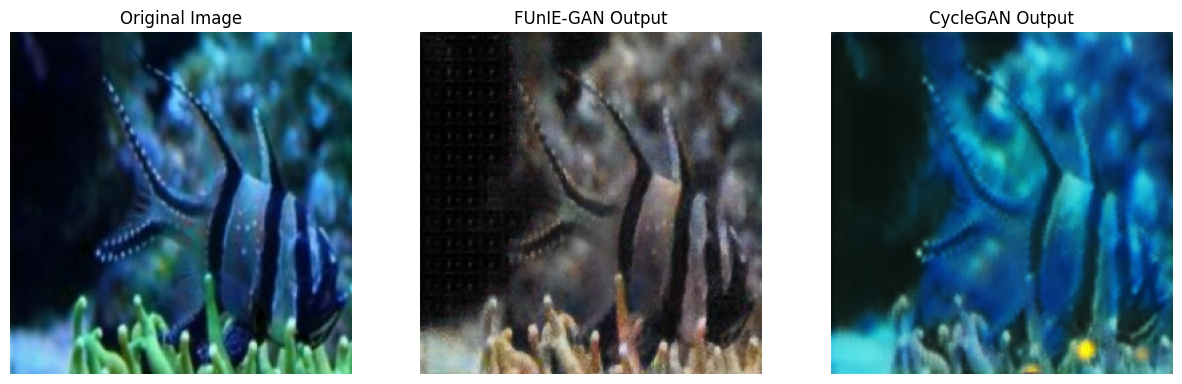

Saved: /content/drive/MyDrive/Compare/Result/comparison_test_p0_.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


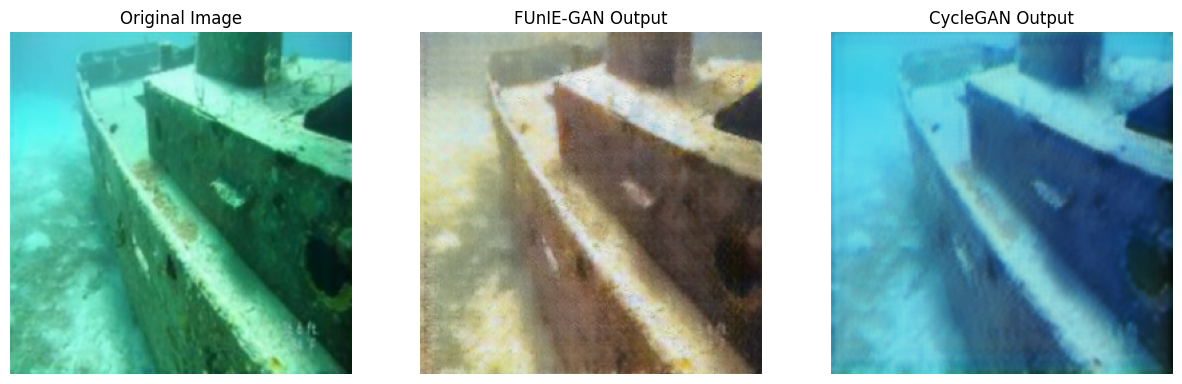

Saved: /content/drive/MyDrive/Compare/Result/comparison_test_p100_.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


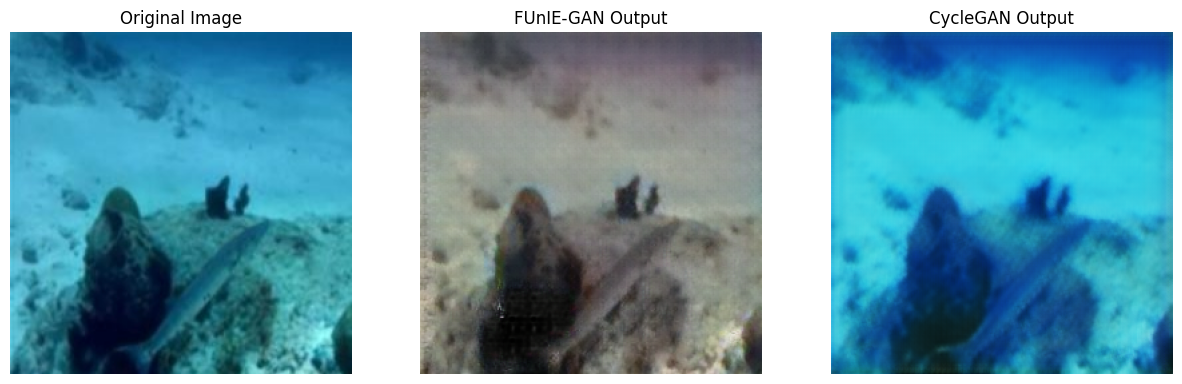

Saved: /content/drive/MyDrive/Compare/Result/comparison_test_p101_.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


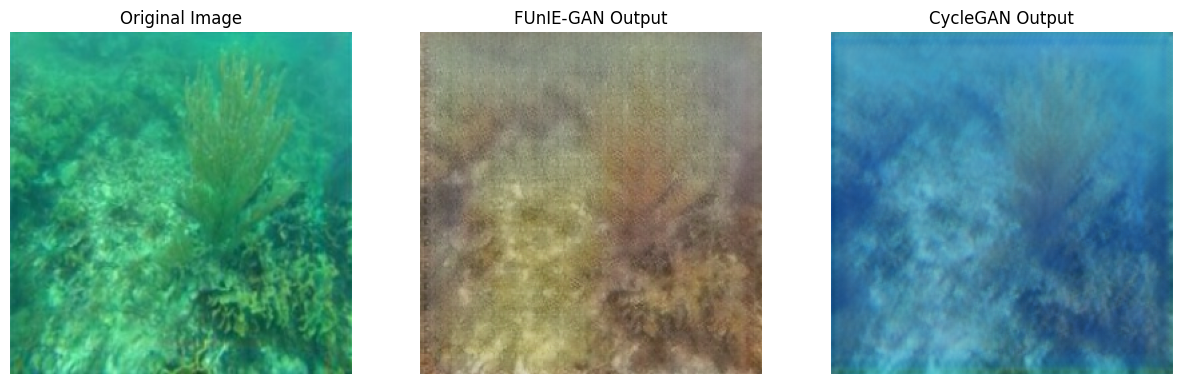

Saved: /content/drive/MyDrive/Compare/Result/comparison_test_p102_.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


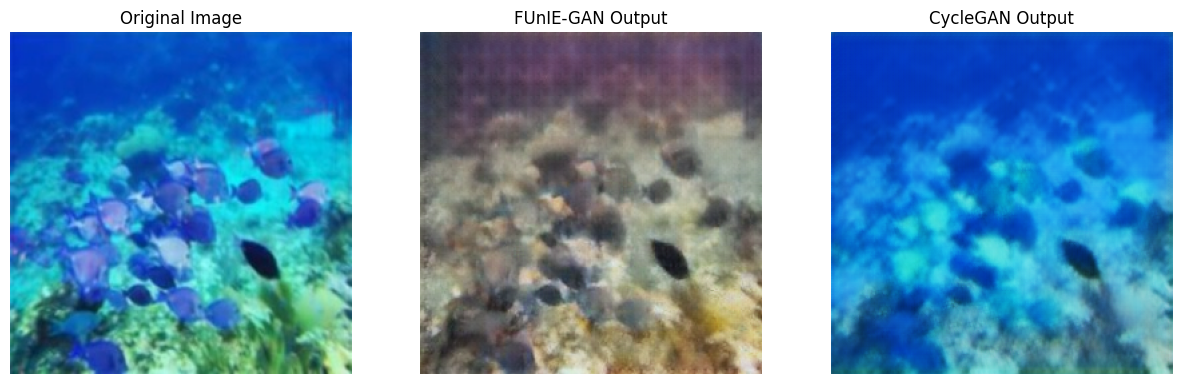

Saved: /content/drive/MyDrive/Compare/Result/comparison_test_p104_.jpg


In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_sample_results(test_folder, model_funie, model_cyclegan, num_samples=5, save_results=True, save_path="/content/drive/MyDrive/Compare/Result"):

    test_images = sorted(os.listdir(test_folder))[:num_samples]

    # Create save directory if needed
    if save_results and not os.path.exists(save_path):
        os.makedirs(save_path)

    for img_name in test_images:
        test_image_path = os.path.join(test_folder, img_name)

        # Load test image
        test_image = load_image(test_image_path)

        # Generate enhanced images
        funie_output = model_funie.predict(test_image)
        cyclegan_output = model_cyclegan.predict(test_image)

        # Convert outputs back to [0, 255] range
        funie_output = ((funie_output[0] + 1) * 127.5).astype(np.uint8)
        cyclegan_output = ((cyclegan_output[0] + 1) * 127.5).astype(np.uint8)
        original_image = ((test_image[0] + 1) * 127.5).astype(np.uint8)

        # Display results
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        axes[0].imshow(original_image)
        axes[0].set_title("Original Image")
        axes[1].imshow(funie_output)
        axes[1].set_title("FUnIE-GAN Output")
        axes[2].imshow(cyclegan_output)
        axes[2].set_title("CycleGAN Output")

        for ax in axes:
            ax.axis("off")
        plt.show()

        # Save results
        if save_results:
            result_path = os.path.join(save_path, f"comparison_{img_name}")
            comparison_image = np.hstack([original_image, funie_output, cyclegan_output])
            cv2.imwrite(result_path, cv2.cvtColor(comparison_image, cv2.COLOR_RGB2BGR))
            print(f"Saved: {result_path}")

# Example usage
test_folder = "/content/drive/MyDrive/Dataset/Test/Inp"
display_sample_results(test_folder, funie_gan_model, cyclegan_model, num_samples=5, save_results=True)


**Compute PSNR, SSIM**

In [11]:
import os
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

def compute_psnr_ssim(test_folder, ground_truth_folder, model):

    test_images = sorted(os.listdir(test_folder))[:515]

    psnr_list, ssim_list = [], []

    for img_name in test_images:
        test_image_path = os.path.join(test_folder, img_name)
        ground_truth_path = os.path.join(ground_truth_folder, img_name)  # Assumes paired images exist

        if not os.path.exists(ground_truth_path):
            continue  # Skip if ground truth is missing

        # Load and preprocess images
        test_image = load_image(test_image_path)
        ground_truth = load_image(ground_truth_path)[0]

        # Generate enhanced image
        enhanced_image = model.predict(test_image)
        enhanced_image = ((enhanced_image[0] + 1) * 127.5).astype(np.uint8)

        # Compute PSNR & SSIM
        psnr_list.append(psnr(ground_truth, enhanced_image, data_range=255))
        ssim_list.append(ssim(ground_truth, enhanced_image, data_range=255, win_size=3, channel_axis=-1))

    # Compute averages
    avg_psnr = np.mean(psnr_list)
    avg_ssim = np.mean(ssim_list)

    return avg_psnr, avg_ssim

# Example usage
test_folder = "/content/drive/MyDrive/Dataset/Test/Inp"
ground_truth_folder = "/content/drive/MyDrive/Dataset/Test/GTr"

funie_psnr, funie_ssim = compute_psnr_ssim(test_folder, ground_truth_folder, funie_gan_model)
cyclegan_psnr, cyclegan_ssim = compute_psnr_ssim(test_folder, ground_truth_folder, cyclegan_model)

print(f"FUnIE-GAN: PSNR = {funie_psnr:.2f}, SSIM = {funie_ssim:.4f}")
print(f"CycleGAN: PSNR = {cyclegan_psnr:.2f}, SSIM = {cyclegan_ssim:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 